# Using Z-Scores to Judge a Value

![Z-Table](Images/Z-table.png)

### Import libraires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ensure plots are displayed inline (only needed in Jupyter notebooks)
%matplotlib inline

### Define your dataset

In [3]:
# Create a DataFrame with normal data and some outliers

np.random.seed(0)  # For reproducibility
data_points = np.random.normal(loc=50, scale=10, size=100)  # Normal distribution
outliers = np.array([90, 95, 100])  # Adding some outliers
data_with_outliers = np.concatenate([data_points, outliers])


In [4]:
# Convert to DataFrame
df = pd.DataFrame(data_with_outliers, columns=['values'])

### Calculate mean and standard deviation

In [5]:
# Calculate mean and standard deviation
mean = df['values'].mean()
std_dev = df['values'].std()

### Calculate z-scores

In [6]:
# Calculate z-scores
z_scores = (df['values'] - mean) / std_dev

### Set a threshold for identifying outliers

In [7]:
# Set a threshold for identifying outliers
threshold = 3
outlier_mask = np.abs(z_scores) > threshold

In [8]:
# Print debug information
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Outliers:", df['values'][outlier_mask].values)

Mean: 51.891339956645474
Standard Deviation: 12.505131494050307
Outliers: [ 90.  95. 100.]


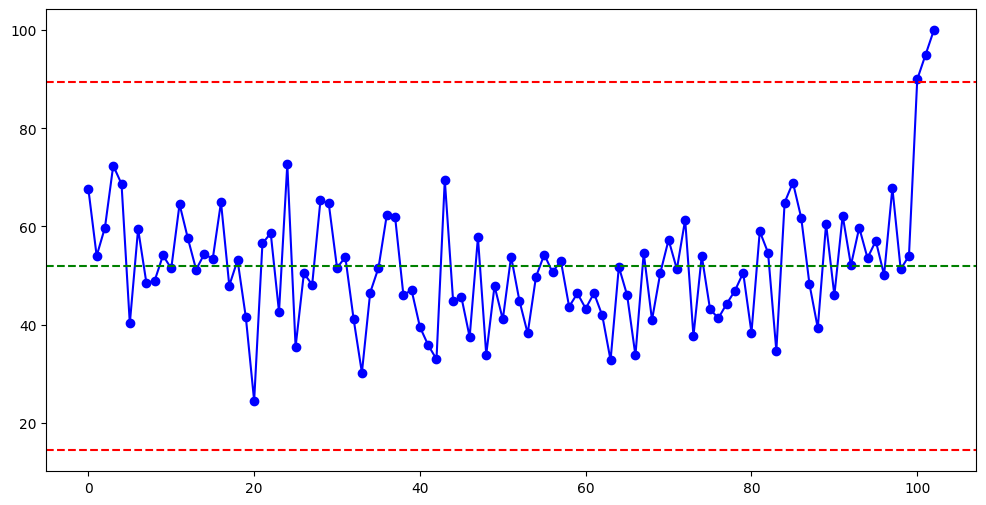

In [9]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['values'], 'o-', label='Data Points', color='blue')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(mean + threshold * std_dev, color='red', linestyle='--', label='Threshold (Mean + 3 Std Dev)')
plt.axhline(mean - threshold * std_dev, color='red', linestyle='--', label='Threshold (Mean - 3 Std Dev)')


### Highlight outliers

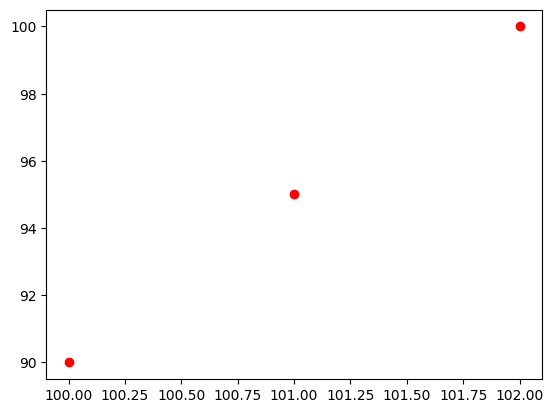

In [10]:
# Highlight outliers
for i, value in enumerate(df['values']):
    if outlier_mask[i]:
        plt.plot(i, value, 'ro')  # Red points for outliers